In [4]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [5]:
gi_df = pd.read_csv("Glass_Identification_Database.csv")

In [6]:
gi_df.shape

(214, 11)

In [7]:
gi_df.dtypes

Id             int64
RI           float64
Na           float64
Mg           float64
Al           float64
Si           float64
K            float64
Ca           float64
Ba           float64
Fe           float64
GlassType      int64
dtype: object

In [11]:
gi_df.sample(10)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
190,191,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00,7
102,103,1.51820,12.62,2.76,0.83,73.81,0.35,9.42,0.00,0.20,2
182,183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6
159,160,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.00,0.09,3
70,71,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.00,0.12,2
63,64,1.52227,14.17,3.81,0.78,71.35,0.00,9.69,0.00,0.00,1
186,187,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
46,47,1.51869,13.19,3.37,1.18,72.72,0.57,8.83,0.00,0.16,1
34,35,1.51783,12.69,3.54,1.34,72.95,0.57,8.75,0.00,0.00,1


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [13]:
gi_df.isnull().values.any()

False

In [15]:
gi_df.isna().values.any()

False

## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


In [18]:
gi_df = gi_df.drop(labels='Id', axis=1)

In [19]:
gi_df.shape

(214, 10)

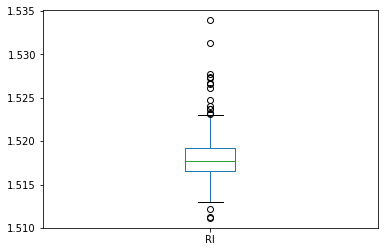

In [23]:
gi_df['RI'].plot(kind='box')

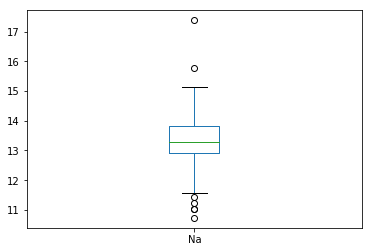

In [24]:
gi_df['Na'].plot(kind='box')

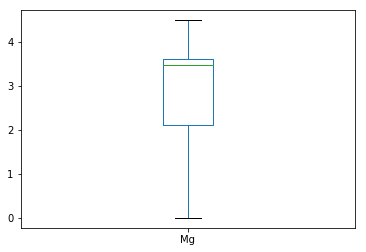

In [25]:
gi_df['Mg'].plot(kind='box')

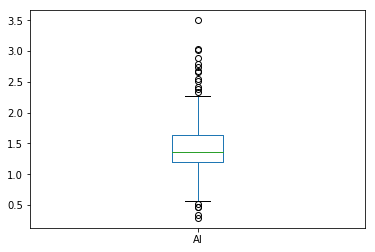

In [26]:
gi_df['Al'].plot(kind='box')

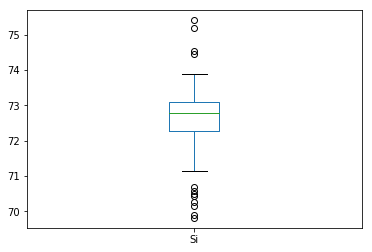

In [27]:
gi_df['Si'].plot(kind='box')

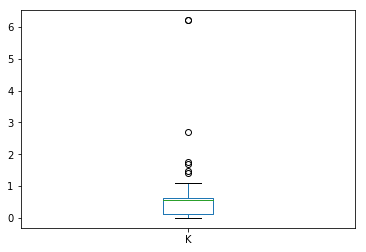

In [28]:
gi_df['K'].plot(kind='box')

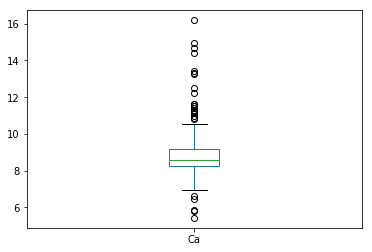

In [29]:
gi_df['Ca'].plot(kind='box')

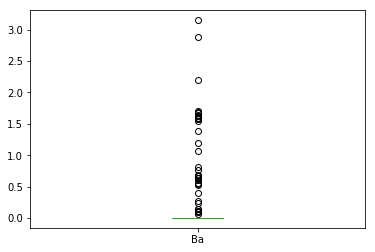

In [30]:
gi_df['Ba'].plot(kind='box')

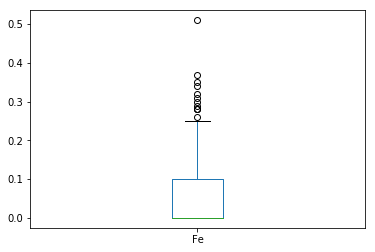

In [31]:
gi_df['Fe'].plot(kind='box')

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [32]:
gi_df['RI'].var()

9.22254137159411e-06

In [33]:
gi_df['Na'].var()

0.6668413672063532

In [34]:
gi_df['Mg'].var()

2.080540390943791

In [35]:
gi_df['Al'].var()

0.24927017901803342

In [36]:
gi_df['Si'].var()

0.5999211881883196

In [37]:
gi_df['K'].var()

0.42535420341362873

In [38]:
gi_df['Ca'].var()

2.0253658483611945

In [39]:
gi_df['Ba'].var()

0.24722699311131596

In [40]:
gi_df['Fe'].var()

0.009494300381729631

In [42]:
gi_df = gi_df.drop(labels='Fe', axis=1)

## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

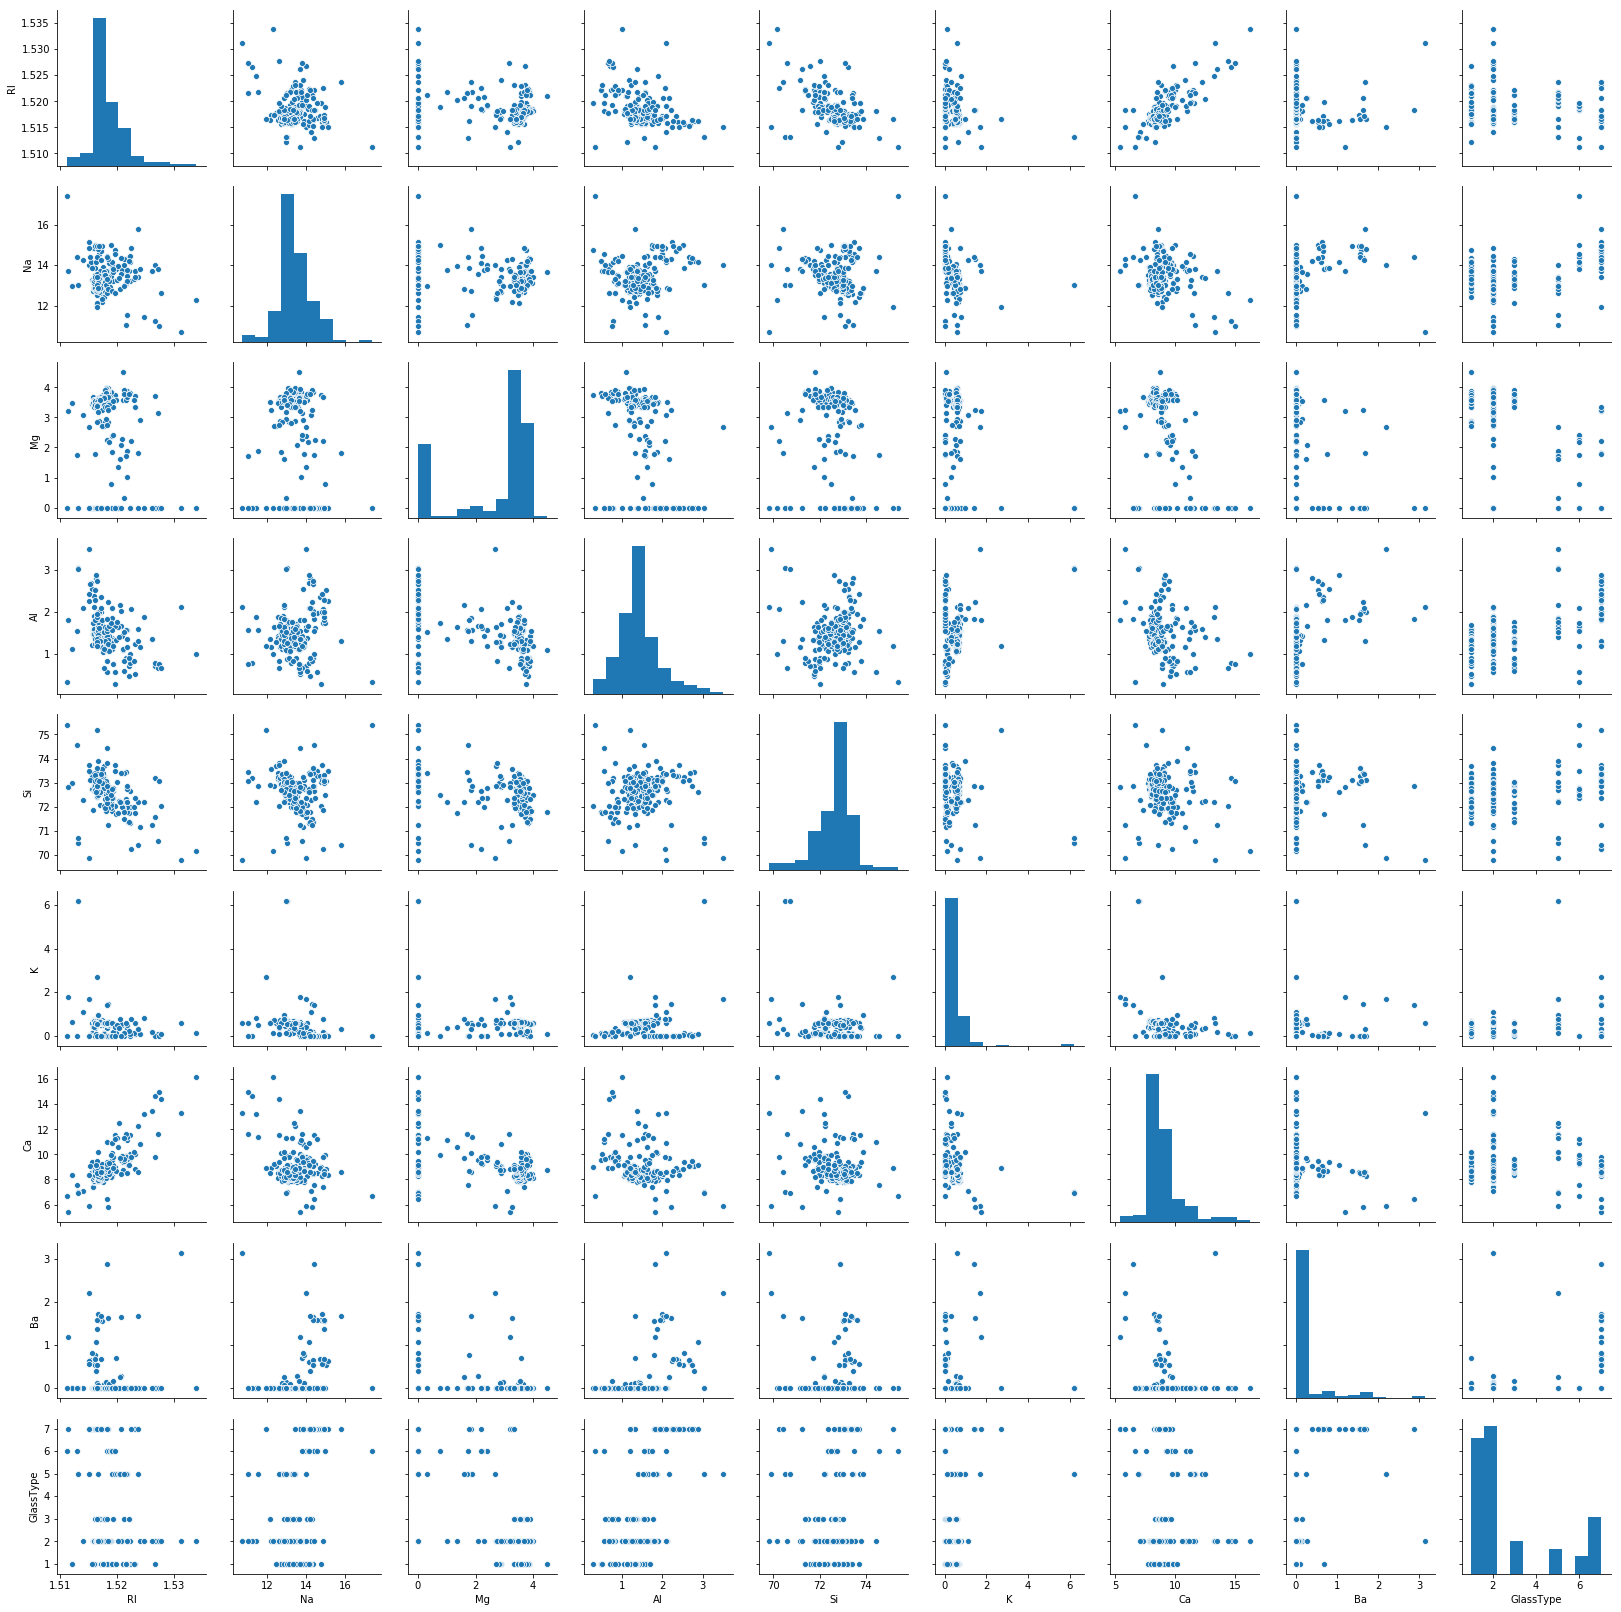

In [43]:
sns.pairplot(gi_df)

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [44]:
gi_df.shape

(214, 9)

In [45]:
gi_feature_df = gi_df.drop(labels='GlassType', axis=1)
gi_feature_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0


In [46]:
gi_feature_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000


In [47]:
gi_feature_df_z = gi_feature_df.apply(zscore)
gi_feature_df_z.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.668608e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00


In [48]:
gi_labels = gi_df["GlassType"]

In [50]:
X = np.array(gi_feature_df_z)
X.shape

(214L, 8L)

In [51]:
Y = np.array(gi_labels)
Y.shape

(214L,)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [54]:
NNH = KNeighborsClassifier(n_neighbors= 3)

In [55]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [56]:
predicted_labels = NNH.predict(X_test)

In [57]:
NNH.score(X_test, y_test)

0.8

In [62]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predicted_labels))

[[23  1  1  0  0  0]
 [ 4 17  0  0  0  0]
 [ 6  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  8]]


In [63]:
NNH = KNeighborsClassifier(n_neighbors= 6)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7692307692307693

In [64]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[23  1  1  0  0  0]
 [ 4 16  0  0  1  0]
 [ 5  2  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  8]]


In [65]:
NNH = KNeighborsClassifier(n_neighbors= 9)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7230769230769231

In [67]:
print(pd.DataFrame(metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 2, 3, 4, 5, 6]), index=['true:1', 'true:2','true:3', 'true:4','true:5', 'true:6'], columns=['pred:1', 'pred:2', 'pred:3', 'pred:4','pred:5', 'pred:6']))

        pred:1  pred:2  pred:3  pred:4  pred:5  pred:6
true:1      22       3       0       0       0       0
true:2       3      15       1       0       0       2
true:3       5       2       0       0       0       0
true:4       0       0       0       0       0       0
true:5       0       1       0       0       1       0
true:6       0       0       0       0       0       1


## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = [1,3,5,7,9,11,13,15,17,19]


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

D:\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


The optimal number of neighbors is 1


In [69]:
NNH = KNeighborsClassifier(n_neighbors= 1)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8

## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

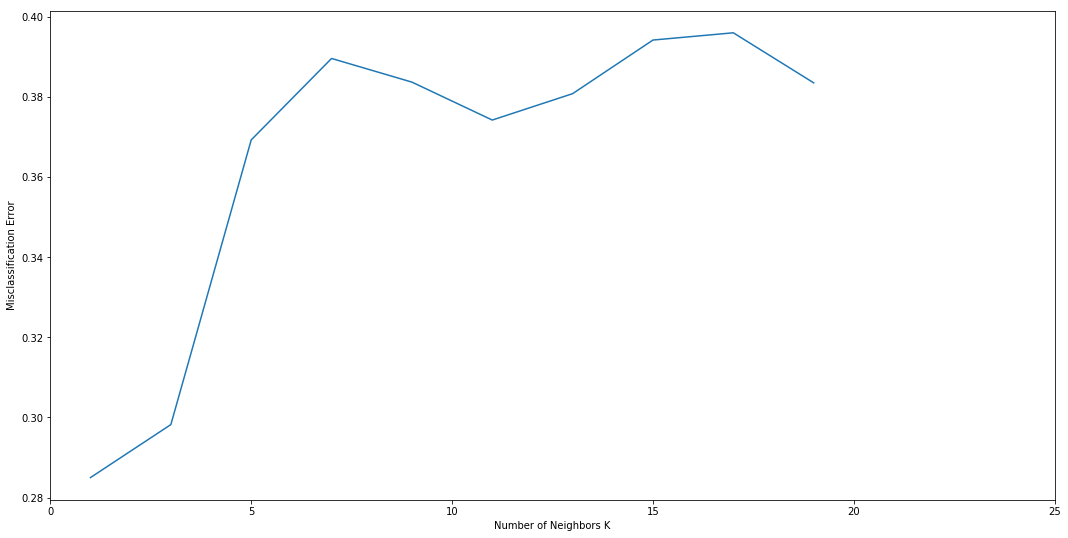

In [71]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()